# **Wine Quality Prediction**

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, accuracy_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [ ]:
df = pd.read_csv("WineQT.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Exploring Dataset

In [ ]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# Data Cleaning

In [ ]:
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# Exploratory Data Analysis (EDA)
# Distribution of Wine Quality

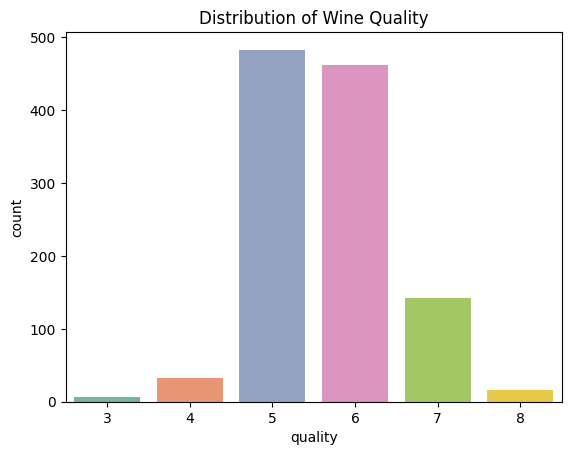

In [ ]:
sns.countplot(x='quality', data=df,palette="Set2")
plt.title("Distribution of Wine Quality")
plt.show()


Most wines fall between quality ratings of 5–6, indicating class imbalance.

# Correlation Heatmap

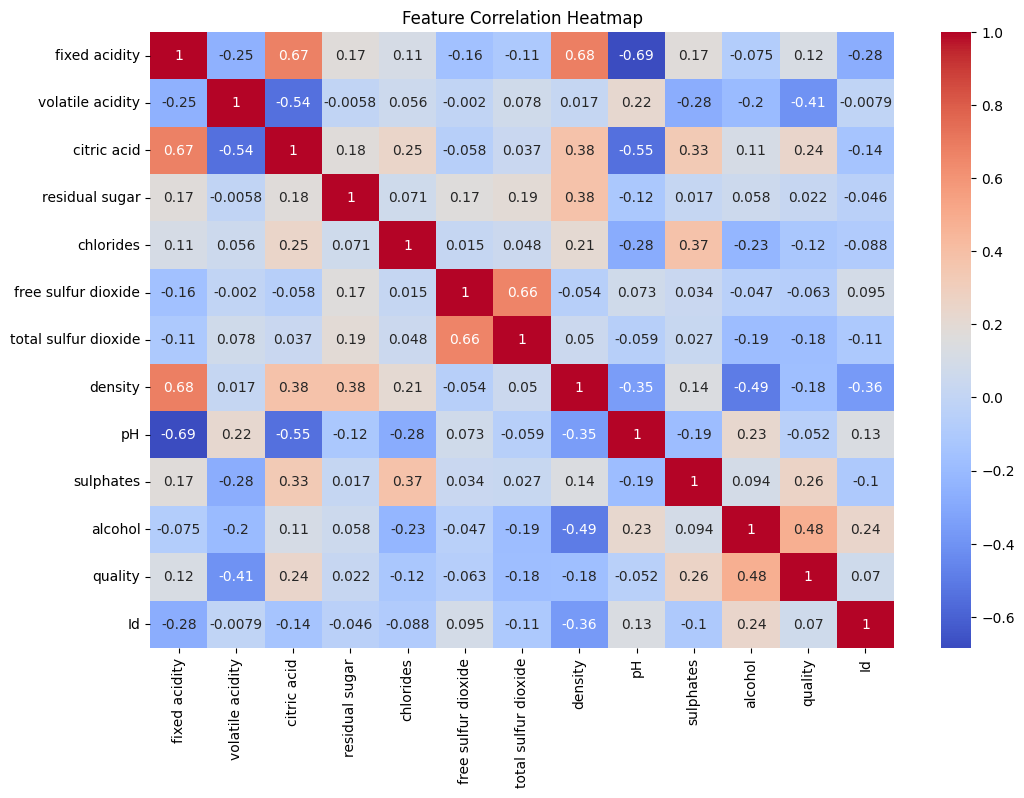

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
fig = px.box(df, x="quality", y="alcohol", color="quality", title="Alcohol Content vs Wine Quality")
fig.show()



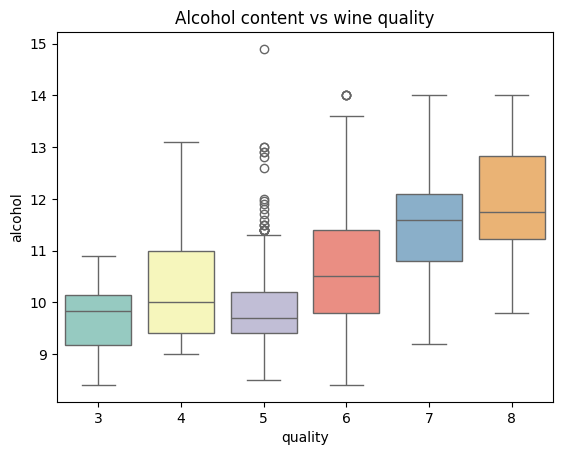

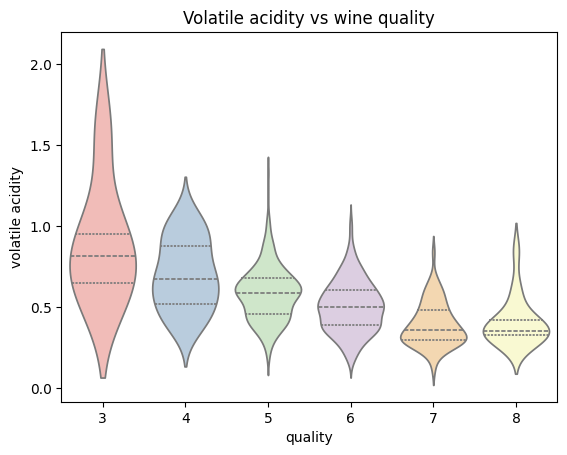

In [ ]:
sns.boxplot(x="quality", y="alcohol", data=df, palette="Set3")
plt.title("Alcohol content vs wine quality")
plt.show()
sns.violinplot(x="quality", y="volatile acidity", data=df, inner="quartile",palette="Pastel1")
plt.title("Volatile acidity vs wine quality")
plt.show()

# Feature & Target Separation

In [ ]:
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

# Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature scaling improves convergence speed and model stability.

# Model Building
# Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000, n_jobs=None)  # n_jobs not supported here; keep default
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)



# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting


In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


# Model Evaluation
Accuracy Comparison

In [ ]:
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("Gradient Boosting Accuracy:", round(accuracy_score(y_test, y_pred_gb), 3))
print("\nClassification report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf, digits=3))

Logistic Regression Accuracy: 0.624
Random Forest Accuracy: 0.712
Gradient Boosting Accuracy: 0.664

Classification report (Random Forest):

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         1
           4      0.000     0.000     0.000         7
           5      0.735     0.856     0.790        97
           6      0.680     0.717     0.698        92
           7      0.737     0.483     0.583        29
           8      0.000     0.000     0.000         3

    accuracy                          0.712       229
   macro avg      0.359     0.343     0.345       229
weighted avg      0.678     0.712     0.689       229



In [ ]:
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("Gradient Boosting Accuracy:", round(accuracy_score(y_test, y_pred_gb), 3))
print("\nClassification report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf, digits=3))

Logistic Regression Accuracy: 0.624
Random Forest Accuracy: 0.712
Gradient Boosting Accuracy: 0.664

Classification report (Random Forest):

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         1
           4      0.000     0.000     0.000         7
           5      0.735     0.856     0.790        97
           6      0.680     0.717     0.698        92
           7      0.737     0.483     0.583        29
           8      0.000     0.000     0.000         3

    accuracy                          0.712       229
   macro avg      0.359     0.343     0.345       229
weighted avg      0.678     0.712     0.689       229



Random Forest outperforms Logistic Regression due to its ability to capture non-linear patterns.

# Confusion Matrix

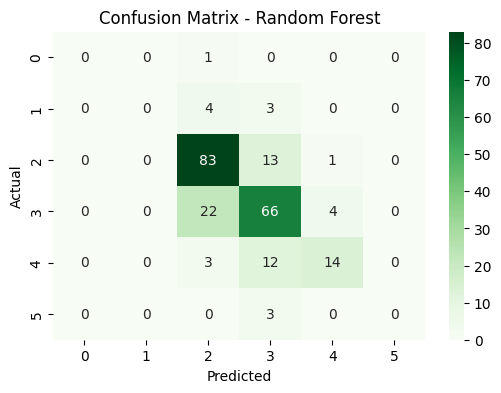

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Feature importance

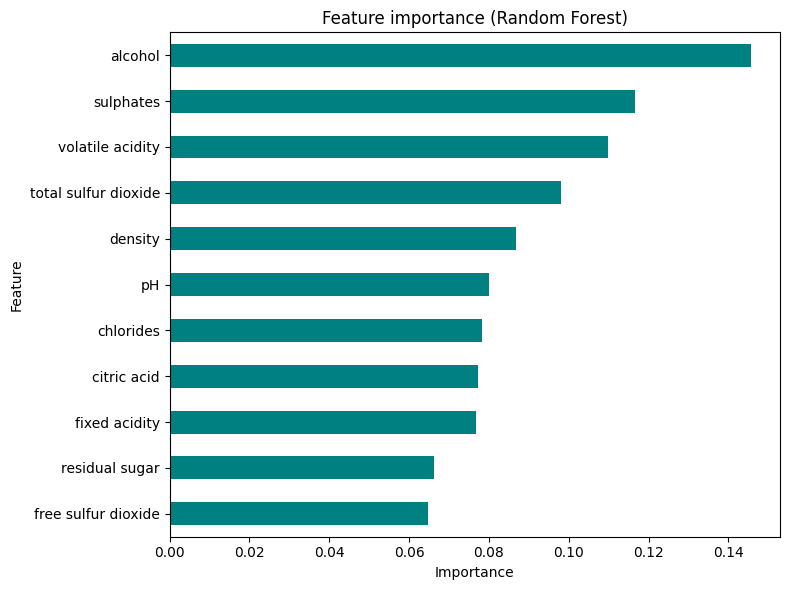

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(8,6))
importances.plot(kind='barh', color='teal')
plt.title("Feature importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Prediction on New Data

In [ ]:
sample = [[7.3, 0.65, 0.0, 1.2, 0.065, 15, 21, 0.9946, 3.39, 0.47, 10.0]]
sample = scaler.transform(sample)
rf.predict(sample)

array([5])

# **Conclusion**


*   The wine quality dataset was successfully analyzed using exploratory data
analysis to understand feature distributions and correlations.
*  Alcohol content showed a positive relationship with wine quality, while volatile acidity negatively impacted quality.
*  Data preprocessing steps such as feature scaling and stratified train–test splitting improved model stability.

*  Multiple machine learning models were trained, including Logistic Regression, Random Forest, and Gradient Boosting.

*  The Random Forest Classifier performed best with an accuracy of around 71%, effectively capturing non-linear patterns.

*  The model performed well for common quality classes (5 and 6), but struggled with rare classes due to class imbalance.

*  This project demonstrates the practical use of machine learning in automated wine quality assessment.

*  Future improvements can include handling class imbalance and advanced hyperparameter tuning.







